In [36]:
import numpy as np
import pandas as pd

In [37]:
import seaborn as sns

In [38]:
import matplotlib.pyplot as plt

In [39]:
data=pd.read_csv("winequality-red.csv")
data

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    11.0                  34.0  0.99780  3.51       0.56   
1                    25.0                  67.0  0.99680  3.20       0.68   
2                    15.0                  54.0  0.99700  3.26       0.65   
3                    17.0                  60.0  0.99800  3.16       0.58   
4                    11.0                  34.0  0.99780  3.51       0.56   
...                   ...                   ...      ...   ...        ...   
1594                 32.0                  44.0  0.99490  3.45       0.58   
1595                 39.0                  51.0  0.99512  3.52       0.76   
1596                 29.0                  40.0  0.99574  3.42       0.75   
1597                 32.0                  44.0  0.99547  3.57       0.71   
1598                 18.0                  42.0  0.99549  3.39       0.66   

      alcohol  quality  
0         9.4        5  
1         9.8        5  
2         9.8        5  
3         9.8        6  
4         9.4        5  
...       ...      ...  
1594     10.5        5  
1595     11.2        6  
1596     11.0        6  
1597     10.2        5  
1598     11.0        6  

[1599 rows x 12 columns]

In [40]:
data.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

# Data Visualization

### Scatter Plot for quality of red wine.

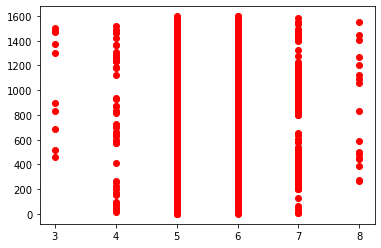

In [6]:
quality=data['quality']
quality.shape[0]
plt.scatter(y=range(0,quality.shape[0],1),x=quality,c='r')

### Scatter plot is unclear. Therefore density plot is required. Histogram using distplot.

C:\Users\Ishan SS\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


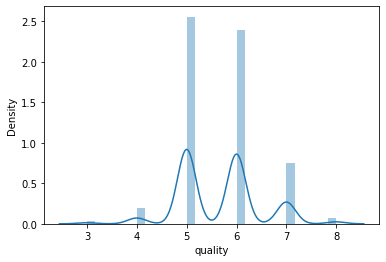

In [7]:
sns.distplot(data.quality)

### Bar Graph with count values

C:\Users\Ishan SS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


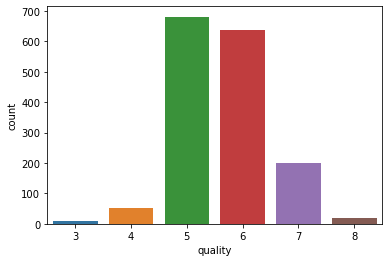

In [46]:
count_plot=sns.countplot(data.quality)

In [48]:
fig = count_plot.get_figure()
fig.savefig("CountPlot.png") 

### Frequency Distribution on table

In [9]:
data.quality.value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

### Caluculating weights for each class entry since the dataset is biased towards class 5 and 6. 
### Weight= reciprocal of frequency of each class

In [10]:
type(data.quality.value_counts())
freq=data.quality.value_counts()
freq=np.array(freq)
freq=freq.astype(float)
freq=np.reciprocal(freq)
freq

array([0.00146843, 0.0015674 , 0.00502513, 0.01886792, 0.05555556,
       0.1       ])

In [11]:
weights={5:freq[0],6:freq[1],7:freq[2],4:freq[3],8:freq[4],3:freq[5]}
weights

{5: 0.0014684287812041115,
 6: 0.001567398119122257,
 7: 0.005025125628140704,
 4: 0.018867924528301886,
 8: 0.05555555555555555,
 3: 0.1}

In [12]:
import json 
file = open("weights.json", "w") 
json.dump(weights,file, indent = 6) 
file.close() 

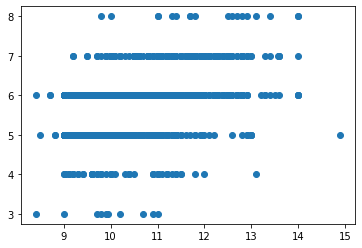

In [13]:
plt.scatter(y=data.quality,x=data.alcohol)

### Generating Pair Plots for whole data

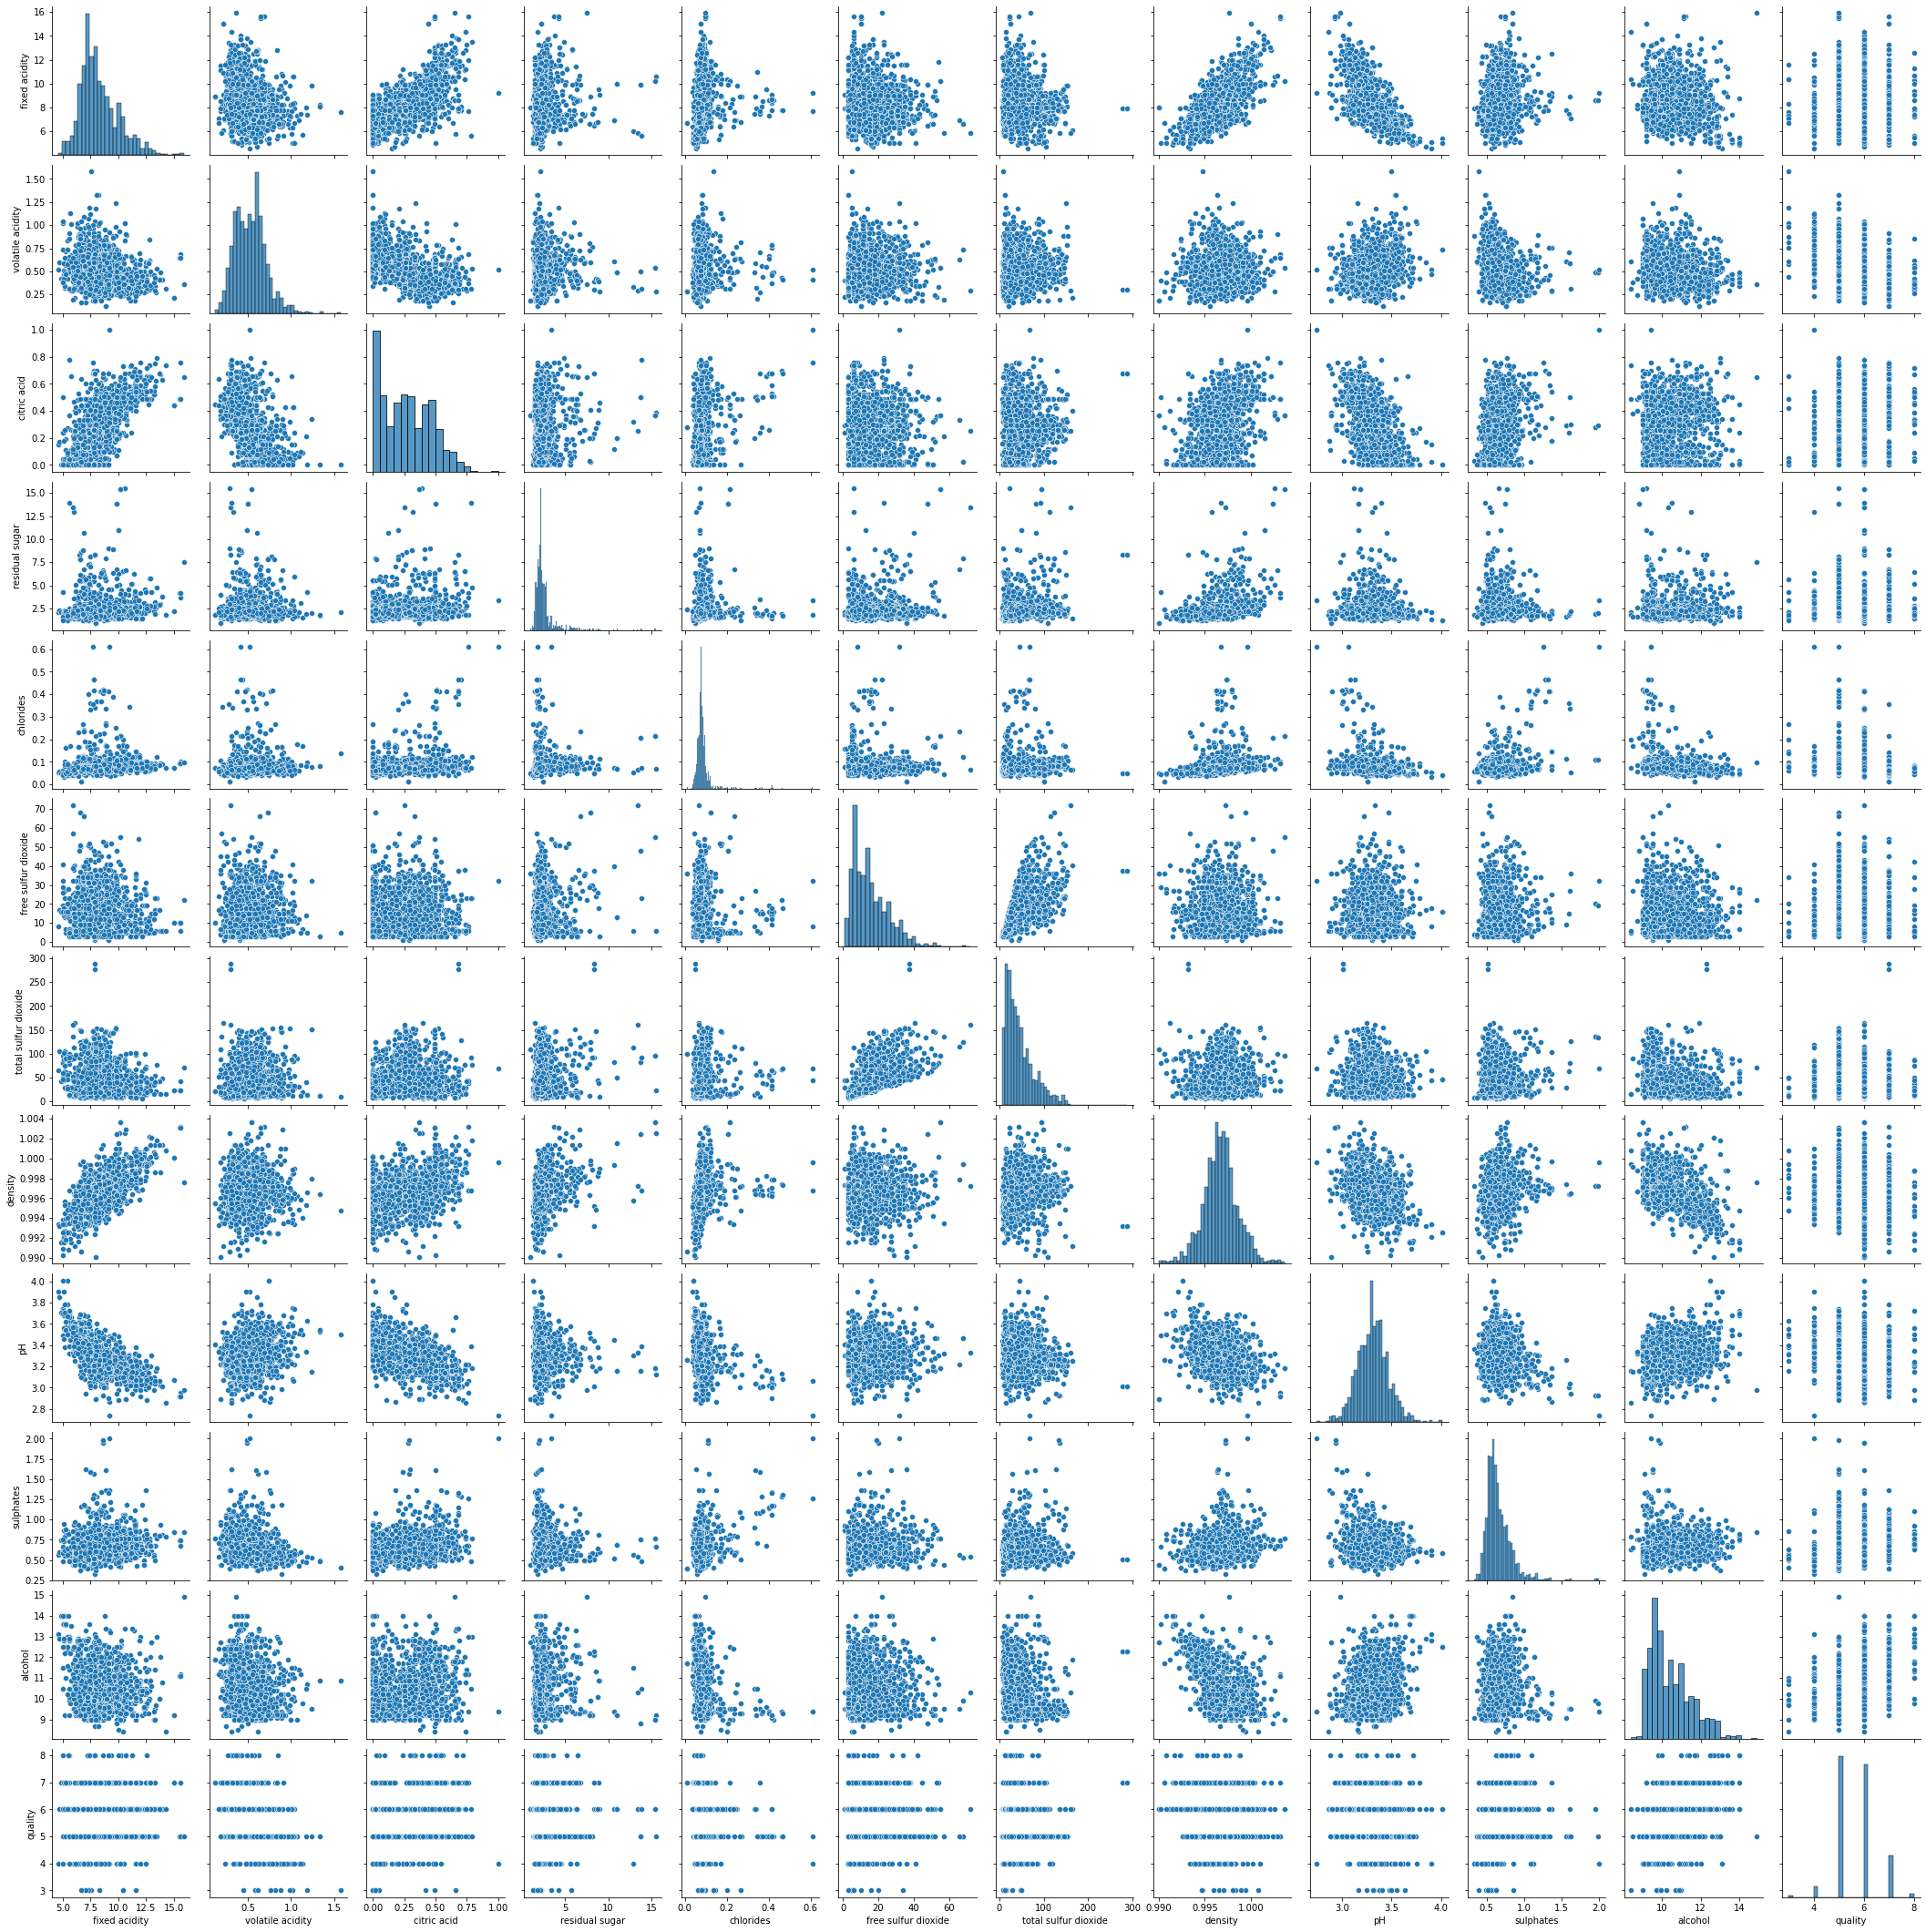

In [14]:
sns.pairplot(data)

In [15]:
#sns.pairplot(data,hue='alcohol')

### Generating Joint plots to observe correlation between parameters using seaborn

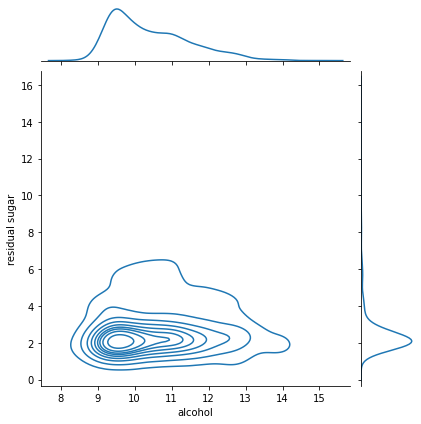

In [16]:
sns.jointplot(x=data.alcohol,y=data['residual sugar'],kind='kde')

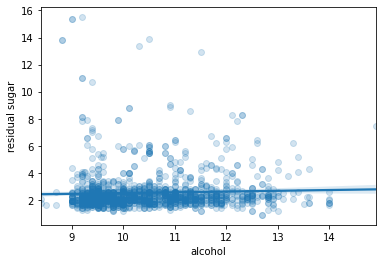

In [17]:
sns.regplot(x=data.alcohol,y=data['residual sugar'],fit_reg=True,scatter_kws={"alpha":0.2})

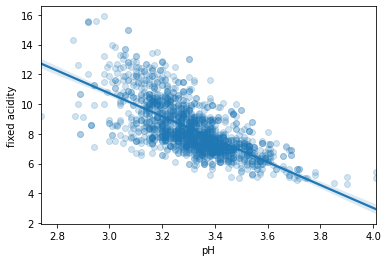

In [18]:
sns.regplot(x=data.pH,y=data['fixed acidity'],fit_reg=True,scatter_kws={"alpha":0.2})

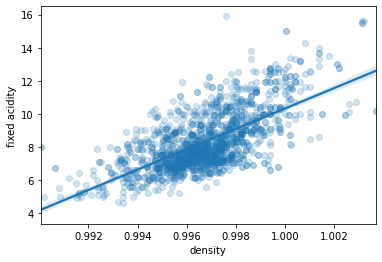

In [19]:
sns.regplot(x=data.density,y=data['fixed acidity'],fit_reg=True,scatter_kws={"alpha":0.2})

### Checking for NULL or NaN values

In [20]:
data.isnull().any()

fixed acidity           False
volatile acidity        False
citric acid             False
residual sugar          False
chlorides               False
free sulfur dioxide     False
total sulfur dioxide    False
density                 False
pH                      False
sulphates               False
alcohol                 False
quality                 False
dtype: bool

In [21]:
data.iloc[0]

fixed acidity            7.4000
volatile acidity         0.7000
citric acid              0.0000
residual sugar           1.9000
chlorides                0.0760
free sulfur dioxide     11.0000
total sulfur dioxide    34.0000
density                  0.9978
pH                       3.5100
sulphates                0.5600
alcohol                  9.4000
quality                  5.0000
Name: 0, dtype: float64

## Preprocessing, Spliting and giving weights

In [22]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [23]:
x=data.iloc[:,0:11]
y=data.iloc[:,11]
x,y

(      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
 0               7.4             0.700         0.00             1.9      0.076   
 1               7.8             0.880         0.00             2.6      0.098   
 2               7.8             0.760         0.04             2.3      0.092   
 3              11.2             0.280         0.56             1.9      0.075   
 4               7.4             0.700         0.00             1.9      0.076   
 ...             ...               ...          ...             ...        ...   
 1594            6.2             0.600         0.08             2.0      0.090   
 1595            5.9             0.550         0.10             2.2      0.062   
 1596            6.3             0.510         0.13             2.3      0.076   
 1597            5.9             0.645         0.12             2.0      0.075   
 1598            6.0             0.310         0.47             3.6      0.067   
 
       free su

### Creating deep copy of x

In [24]:
x_mod=x.copy()
for w in weights:
    for i in range(len(x)):
        if y.iloc[i]==w:
            x_mod.iloc[i]=x_mod.iloc[i]*weights[w]
x_mod

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0          0.010866          0.001028     0.000000        0.002790   0.000112   
1          0.011454          0.001292     0.000000        0.003818   0.000144   
2          0.011454          0.001116     0.000059        0.003377   0.000135   
3          0.017555          0.000439     0.000878        0.002978   0.000118   
4          0.010866          0.001028     0.000000        0.002790   0.000112   
...             ...               ...          ...             ...        ...   
1594       0.009104          0.000881     0.000117        0.002937   0.000132   
1595       0.009248          0.000862     0.000157        0.003448   0.000097   
1596       0.009875          0.000799     0.000204        0.003605   0.000119   
1597       0.008664          0.000947     0.000176        0.002937   0.000110   
1598       0.009404          0.000486     0.000737        0.005643   0.000105   

      free sulfur dioxide  total sulfur dioxide   density        pH  \
0                0.016153              0.049927  0.001465  0.005154   
1                0.036711              0.098385  0.001464  0.004699   
2                0.022026              0.079295  0.001464  0.004787   
3                0.026646              0.094044  0.001564  0.004953   
4                0.016153              0.049927  0.001465  0.005154   
...                   ...                   ...       ...       ...   
1594             0.046990              0.064611  0.001461  0.005066   
1595             0.061129              0.079937  0.001560  0.005517   
1596             0.045455              0.062696  0.001561  0.005361   
1597             0.046990              0.064611  0.001462  0.005242   
1598             0.028213              0.065831  0.001560  0.005313   

      sulphates   alcohol  
0      0.000822  0.013803  
1      0.000999  0.014391  
2      0.000954  0.014391  
3      0.000909  0.015361  
4      0.000822  0.013803  
...         ...       ...  
1594   0.000852  0.015419  
1595   0.001191  0.017555  
1596   0.001176  0.017241  
1597   0.001043  0.014978  
1598   0.001034  0.017241  

[1599 rows x 11 columns]

In [25]:
x_mod.iloc[0]

fixed acidity           0.010866
volatile acidity        0.001028
citric acid             0.000000
residual sugar          0.002790
chlorides               0.000112
free sulfur dioxide     0.016153
total sulfur dioxide    0.049927
density                 0.001465
pH                      0.005154
sulphates               0.000822
alcohol                 0.013803
Name: 0, dtype: float64

In [26]:
x.iloc[0]

fixed acidity            7.4000
volatile acidity         0.7000
citric acid              0.0000
residual sugar           1.9000
chlorides                0.0760
free sulfur dioxide     11.0000
total sulfur dioxide    34.0000
density                  0.9978
pH                       3.5100
sulphates                0.5600
alcohol                  9.4000
Name: 0, dtype: float64

In [27]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.33,random_state=42)
xtrain_mod,xtest_mod,ytrain_mod,ytest_mod=train_test_split(x_mod,y,test_size=0.33,random_state=42)
xtrain

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
548            12.4             0.350         0.49             2.6      0.079   
355             6.7             0.750         0.01             2.4      0.078   
1296            6.6             0.630         0.00             4.3      0.093   
209            11.0             0.300         0.58             2.1      0.054   
140             8.4             0.745         0.11             1.9      0.090   
...             ...               ...          ...             ...        ...   
1130            9.1             0.600         0.00             1.9      0.058   
1294            8.2             0.635         0.10             2.1      0.073   
860             7.2             0.620         0.06             2.7      0.077   
1459            7.9             0.200         0.35             1.7      0.054   
1126            5.8             0.290         0.26             1.7      0.063   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
548                  27.0                  69.0  0.99940  3.12       0.75   
355                  17.0                  32.0  0.99550  3.55       0.61   
1296                 51.0                  77.5  0.99558  3.20       0.45   
209                   7.0                  19.0  0.99800  3.31       0.88   
140                  16.0                  63.0  0.99650  3.19       0.82   
...                   ...                   ...      ...   ...        ...   
1130                  5.0                  10.0  0.99770  3.18       0.63   
1294                 25.0                  60.0  0.99638  3.29       0.75   
860                  15.0                  85.0  0.99746  3.51       0.54   
1459                  7.0                  15.0  0.99458  3.32       0.80   
1126                  3.0                  11.0  0.99150  3.39       0.54   

      alcohol  
548      10.4  
355      12.8  
1296      9.5  
209      10.5  
140       9.6  
...       ...  
1130     10.4  
1294     10.9  
860       9.5  
1459     11.9  
1126     13.5  

[1071 rows x 11 columns]

In [28]:
scaler=StandardScaler()
scaler_mod=StandardScaler()
xtrain=scaler.fit_transform(xtrain)
xtest=scaler.transform(xtest)
xtrain_mod=scaler.fit_transform(xtrain_mod)
xtest_mod=scaler.transform(xtest_mod)
xtrain_mod

array([[-0.13528213, -0.20750231, -0.07454667, ..., -0.22034404,
        -0.19364076, -0.21761793],
       [-0.23140503, -0.12815745, -0.26679232, ..., -0.20093939,
        -0.2255126 , -0.18317317],
       [-0.24011917, -0.1598517 , -0.27079744, ..., -0.22585207,
        -0.26840621, -0.2391438 ],
       ...,
       [-0.23063985, -0.16171007, -0.24828409, ..., -0.21274599,
        -0.24921089, -0.2391438 ],
       [ 0.08272526, -0.14973805,  0.17862103, ...,  0.11919311,
         0.21951489,  0.18067488],
       [-0.24658233, -0.21940404, -0.16666438, ..., -0.20815973,
        -0.24144853, -0.17312678]])

In [30]:
import joblib
joblib.dump(scaler, 'scaler.mod')

['scaler.mod']

## Logistic Regression Model

### Unoptimized LR

In [29]:
LogR=LogisticRegression()
LogR.fit(xtrain,ytrain)
LogR_mod=LogisticRegression()
LogR_mod.fit(xtrain_mod,ytrain_mod)

C:\Users\Ishan SS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Ishan SS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Ishan SS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Ishan SS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [30]:
print("Scaled Data-")
LogR.score(xtrain,ytrain),LogR.score(xtest,ytest)

Scaled Data-


(0.6031746031746031, 0.5643939393939394)

In [31]:
print("Scaled and Balanced Data-")
LogR.score(xtrain_mod,ytrain_mod),LogR.score(xtest_mod,ytest_mod)

Scaled and Balanced Data-


(0.4407096171802054, 0.4147727272727273)

### ovr vs multinomial for multiclass classification using newton convergence algo

#### ovr classification-

#### Scaled Data

In [32]:
#finding optimum value of c
max_score=0
optimum_c=0
algo='newton-cg'
for c in range(1,100,1):
    clf=LogisticRegression(solver=algo,C=c, max_iter=1000,multi_class='ovr')
    clf.fit(xtrain,ytrain)
    sc=clf.score(xtrain,ytrain)
    print(".",end="")
    if sc>max_score:
        max_score=sc
        optimum_c=c
print()
print("Optimum C=",optimum_c,"With score=",max_score)

LogR=LogisticRegression(solver=algo,C=optimum_c, max_iter=100,multi_class='ovr')
LogR.fit(xtrain,ytrain)
print("Test Score = ",LogR.score(xtrain,ytrain))
print("Test Score = ",LogR.score(xtest,ytest))

...................................................................................................
Optimum C= 1 With score= 0.6059757236227824
Test Score =  0.6059757236227824
Test Score =  0.5662878787878788


#### Scaled + Modified Data

In [33]:
max_score=0
optimum_c=0
algo='newton-cg'
for c in range(1,100,1):
    clf=LogisticRegression(solver=algo,C=c, max_iter=1000,multi_class='ovr')
    clf.fit(xtrain,ytrain)
    sc=clf.score(xtrain,ytrain)
    print(".",end="")
    if sc>max_score:
        max_score=sc
        optimum_c=c
print()
print("Optimum C=",optimum_c,"With score=",max_score)

LogR_mod=LogisticRegression(solver=algo,C=optimum_c, max_iter=100,multi_class='ovr')
LogR_mod.fit(xtrain_mod,ytrain_mod)
print("Train Score = ",LogR_mod.score(xtrain_mod,ytrain_mod))
print("Test Score = ",LogR_mod.score(xtest_mod,ytest_mod))

...................................................................................................
Optimum C= 1 With score= 0.6059757236227824
Train Score =  0.6956115779645191
Test Score =  0.6837121212121212


#### multinomial classification-

#### Scaled Data

In [34]:
#finding optimum value of c
max_score=0
optimum_c=0
algo='newton-cg'
for c in range(1,100,1):
    clf=LogisticRegression(solver=algo,C=c, max_iter=1000,multi_class='multinomial')
    clf.fit(xtrain,ytrain)
    sc=clf.score(xtrain,ytrain)
    print(".",end="")
    if sc>max_score:
        max_score=sc
        optimum_c=c
print()
print("Optimum C=",optimum_c,"With score=",max_score)

LogR=LogisticRegression(solver=algo,C=optimum_c, max_iter=100,multi_class='multinomial')
LogR.fit(xtrain,ytrain)
print("Test Score = ",LogR.score(xtrain,ytrain))
print("Test Score = ",LogR.score(xtest,ytest))

...................................................................................................
Optimum C= 36 With score= 0.6246498599439776
Test Score =  0.6246498599439776
Test Score =  0.571969696969697


#### Scaled + Modified Data

In [35]:
#finding optimum value of c
max_score=0
optimum_c=0
algo='newton-cg'
for c in range(1,100,1):
    clf=LogisticRegression(solver=algo,C=c, max_iter=1000,multi_class='multinomial')
    clf.fit(xtrain,ytrain)
    sc=clf.score(xtrain,ytrain)
    print(".",end="")
    if sc>max_score:
        max_score=sc
        optimum_c=c
print()
print("Optimum C=",optimum_c,"With score=",max_score)

LogR_mod=LogisticRegression(solver=algo,C=optimum_c, max_iter=100,multi_class='multinomial')
LogR_mod.fit(xtrain_mod,ytrain_mod)
print("Train Score = ",LogR_mod.score(xtrain_mod,ytrain_mod))
print("Test Score = ",LogR_mod.score(xtest_mod,ytest_mod))

...................................................................................................
Optimum C= 36 With score= 0.6246498599439776
Train Score =  0.9243697478991597
Test Score =  0.9204545454545454


### Further details using Confusion Matrix and Classification Report

In [36]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [37]:
ytrain_pred=LogR.predict(xtrain)
ytest_pred=LogR.predict(xtest)
ytrain_pred

array([6, 6, 5, ..., 5, 7, 7], dtype=int64)

In [38]:
ytrain_pred_mod=LogR_mod.predict(xtrain_mod)
ytest_pred_mod=LogR_mod.predict(xtest_mod)
ytrain_pred_mod

array([6, 6, 5, ..., 5, 7, 6], dtype=int64)

#### Confusion Matrices for Scaled Data

In [39]:
print("Train","\n",confusion_matrix(ytrain,ytrain_pred))
print("Test","\n",confusion_matrix(ytest,ytest_pred))

Train 
 [[  3   0   4   1   0   0]
 [  0   1  21  11   1   0]
 [  1   0 357 105   1   0]
 [  1   0 136 266  22   0]
 [  0   0   7  80  42   0]
 [  0   0   0   8   3   0]]
Test 
 [[  1   0   1   0   0   0]
 [  0   1  10   7   1   0]
 [  1   0 163  53   0   0]
 [  1   1  76 119  16   0]
 [  0   0   5  47  18   0]
 [  0   0   0   2   5   0]]


#### Confusion Matrices for Scaled and Modified Data

In [40]:
print("Train","\n",confusion_matrix(ytrain_mod,ytrain_pred_mod))
print("Test","\n",confusion_matrix(ytest_mod,ytest_pred_mod))

Train 
 [[  8   0   0   0   0   0]
 [  0  34   0   0   0   0]
 [  0   0 430  34   0   0]
 [  0   0  47 378   0   0]
 [  0   0   0   0 129   0]
 [  0   0   0   0   0  11]]
Test 
 [[  1   1   0   0   0   0]
 [  0  19   0   0   0   0]
 [  0   0 200  17   0   0]
 [  0   0  24 189   0   0]
 [  0   0   0   0  70   0]
 [  0   0   0   0   0   7]]


#### Classification Reports for Scaled Data

In [41]:
print("Train","\n",classification_report(ytrain,ytrain_pred))
print("Test","\n",classification_report(ytest,ytest_pred))

Train 
               precision    recall  f1-score   support

           3       0.60      0.38      0.46         8
           4       1.00      0.03      0.06        34
           5       0.68      0.77      0.72       464
           6       0.56      0.63      0.59       425
           7       0.61      0.33      0.42       129
           8       0.00      0.00      0.00        11

    accuracy                           0.62      1071
   macro avg       0.58      0.35      0.38      1071
weighted avg       0.63      0.62      0.60      1071

Test 
               precision    recall  f1-score   support

           3       0.33      0.50      0.40         2
           4       0.50      0.05      0.10        19
           5       0.64      0.75      0.69       217
           6       0.52      0.56      0.54       213
           7       0.45      0.26      0.33        70
           8       0.00      0.00      0.00         7

    accuracy                           0.57       528
   macro

C:\Users\Ishan SS\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


#### Classification Reports for Scaled and Modified Data

In [42]:
print("Train","\n",classification_report(ytrain_mod,ytrain_pred_mod))
print("Test","\n",classification_report(ytest_mod,ytest_pred_mod))

Train 
               precision    recall  f1-score   support

           3       1.00      1.00      1.00         8
           4       1.00      1.00      1.00        34
           5       0.90      0.93      0.91       464
           6       0.92      0.89      0.90       425
           7       1.00      1.00      1.00       129
           8       1.00      1.00      1.00        11

    accuracy                           0.92      1071
   macro avg       0.97      0.97      0.97      1071
weighted avg       0.92      0.92      0.92      1071

Test 
               precision    recall  f1-score   support

           3       1.00      0.50      0.67         2
           4       0.95      1.00      0.97        19
           5       0.89      0.92      0.91       217
           6       0.92      0.89      0.90       213
           7       1.00      1.00      1.00        70
           8       1.00      1.00      1.00         7

    accuracy                           0.92       528
   macro

#### Clearly Modified Data outperforms simple scaled data in Logisitc Regression

### Applying PCA on Scaled and Modified Data

In [43]:
def optimize(xtrain,xtest,ytrain,ytest):
    print("Optimizing ")
    print("Using ovr in multi_class : ")
    max_score=0
    optimum_c=0
    algo='newton-cg'
    for c in range(1,100,1):
        clf=LogisticRegression(solver=algo,C=c, max_iter=100,multi_class='ovr')
        clf.fit(xtrain,ytrain)
        sc=clf.score(xtrain,ytrain)
        print(".",end="")
        if sc>max_score:
            max_score=sc
            optimum_c=c
    print()
    print("Optimum C=",optimum_c,"With score=",max_score)
    LogR1=LogisticRegression(solver=algo,C=optimum_c, max_iter=100,multi_class='ovr')
    LogR1.fit(xtrain,ytrain)
    test1=LogR1.score(xtest,ytest)
    print(test1)
    
    print("Using multinomial in multi_class : ")
    max_score=0
    optimum_c=0
    algo='newton-cg'
    for c in range(1,100,1):
        clf=LogisticRegression(solver=algo,C=c, max_iter=100,multi_class='multinomial')
        clf.fit(xtrain,ytrain)
        sc=clf.score(xtrain,ytrain)
        print(".",end="")
        if sc>max_score:
            max_score=sc
            optimum_c=c
    print()
    print("Optimum C=",optimum_c,"With score=",max_score)
    LogR2=LogisticRegression(solver=algo,C=optimum_c, max_iter=100,multi_class='multinomial')
    LogR2.fit(xtrain,ytrain)
    test2=LogR2.score(xtest,ytest)
    print(test2)
    
    if test2>=test1:
        LogR2.fit(xtrain,ytrain)
        print("Train Score: ",LogR2.score(xtrain,ytrain))
        print("Test Score",LogR2.score(xtest,ytest))
        return test2
    else:
        LogR1.fit(xtrain,ytrain)
        print("Train Score: ",LogR1.score(xtrain,ytrain))
        print("Test Score",LogR1.score(xtest,ytest))
        return test1
    

In [44]:
def Logistic_Reg(xtrain,xtest,ytrain,ytest):
    LogR=LogisticRegression(solver='liblinear')
    LogR.fit(xtrain,ytrain)
    print("Applying Inbuilt Logisitc Regression : ")
    print("Train Score: ",LogR.score(xtrain,ytrain))
    testPercent=LogR.score(xtest,ytest)
    print("Test Score",testPercent)
    ytrain_pred=LogR.predict(xtrain)
    ytest_pred=LogR.predict(xtest)
    if testPercent<0.90:
        score=optimize(xtrain,xtest,ytrain,ytest)
    return score

In [45]:
from sklearn.decomposition import PCA

In [46]:
yy=[]
print("Without PCA : ")
finalscore0=Logistic_Reg(xtrain_mod,xtest_mod,ytrain_mod,ytest_mod)
yy.append(finalscore0)
for i in range(1,int(xtrain_mod.shape[1]),1):
    pca=PCA(n_components=i)
    xtrain1=pca.fit_transform(xtrain_mod)
    xtest1=pca.transform(xtest_mod)
    print()
    print("PCA ",i)
    finalscore=Logistic_Reg(xtrain1,xtest1,ytrain_mod,ytest_mod)
    yy.append(finalscore)

C:\Users\Ishan SS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Without PCA : 
Applying Inbuilt Logisitc Regression : 
Train Score:  0.6862745098039216
Test Score 0.6666666666666666
Optimizing 
Using ovr in multi_class : 
...................................................................................................
Optimum C= 99 With score= 0.8972922502334267
0.8806818181818182
Using multinomial in multi_class : 
...................................................................................................
Optimum C= 96 With score= 0.9645191409897292
0.9583333333333334
Train Score:  0.9645191409897292
Test Score 0.9583333333333334

PCA  1
Applying Inbuilt Logisitc Regression : 
Train Score:  0.5518207282913166
Test Score 0.5473484848484849
Optimizing 
Using ovr in multi_class : 
..

C:\Users\Ishan SS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


.................................................................................................
Optimum C= 1 With score= 0.5602240896358543
0.5511363636363636
Using multinomial in multi_class : 
...................................................................................................
Optimum C= 1 With score= 0.6003734827264239
0.5928030303030303
Train Score:  0.6003734827264239
Test Score 0.5928030303030303

PCA  2
Applying Inbuilt Logisitc Regression : 
Train Score:  0.5751633986928104
Test Score 0.5416666666666666
Optimizing 
Using ovr in multi_class : 
.

C:\Users\Ishan SS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


..................................................................................................
Optimum C= 70 With score= 0.6255835667600373
0.5984848484848485
Using multinomial in multi_class : 
...................................................................................................
Optimum C= 99 With score= 0.6853408029878618
0.6818181818181818
Train Score:  0.6853408029878618
Test Score 0.6818181818181818

PCA  3
Applying Inbuilt Logisitc Regression : 


C:\Users\Ishan SS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Train Score:  0.6022408963585434
Test Score 0.5928030303030303
Optimizing 
Using ovr in multi_class : 
...................................................................................................
Optimum C= 68 With score= 0.6321195144724556
0.6306818181818182
Using multinomial in multi_class : 
...................................................................................................
Optimum C= 83 With score= 0.7002801120448179
0.6931818181818182
Train Score:  0.7002801120448179
Test Score 0.6931818181818182

PCA  4
Applying Inbuilt Logisitc Regression : 
Train Score:  0.6013071895424836
Test Score 0.5833333333333334
Optimizing 
Using ovr in multi_class : 
.

C:\Users\Ishan SS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


..................................................................................................
Optimum C= 90 With score= 0.6321195144724556
0.625
Using multinomial in multi_class : 
...................................................................................................
Optimum C= 86 With score= 0.704014939309057
0.6912878787878788
Train Score:  0.704014939309057
Test Score 0.6912878787878788

PCA  5
Applying Inbuilt Logisitc Regression : 
Train Score:  0.6517273576097106
Test Score 0.6439393939393939
Optimizing 
Using ovr in multi_class : 
.

C:\Users\Ishan SS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


..................................................................................................
Optimum C= 94 With score= 0.6872082166199813
0.6799242424242424
Using multinomial in multi_class : 
...................................................................................................
Optimum C= 97 With score= 0.7413632119514473
0.7386363636363636
Train Score:  0.7413632119514473
Test Score 0.7386363636363636

PCA  6
Applying Inbuilt Logisitc Regression : 
Train Score:  0.6666666666666666
Test Score 0.6401515151515151
Optimizing 
Using ovr in multi_class : 
.

C:\Users\Ishan SS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


..................................................................................................
Optimum C= 60 With score= 0.800186741363212
0.7803030303030303
Using multinomial in multi_class : 
...................................................................................................
Optimum C= 15 With score= 0.8403361344537815
0.8314393939393939
Train Score:  0.8403361344537815
Test Score 0.8314393939393939

PCA  7
Applying Inbuilt Logisitc Regression : 
Train Score:  0.6741363211951448
Test Score 0.6496212121212122
Optimizing 
Using ovr in multi_class : 
.

C:\Users\Ishan SS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


..................................................................................................
Optimum C= 72 With score= 0.8104575163398693
0.7840909090909091
Using multinomial in multi_class : 
...................................................................................................
Optimum C= 36 With score= 0.84593837535014
0.8390151515151515
Train Score:  0.84593837535014
Test Score 0.8390151515151515

PCA  8
Applying Inbuilt Logisitc Regression : 
Train Score:  0.6853408029878618
Test Score 0.6685606060606061
Optimizing 
Using ovr in multi_class : 
.

C:\Users\Ishan SS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


..................................................................................................
Optimum C= 94 With score= 0.8851540616246498
0.8598484848484849
Using multinomial in multi_class : 
...................................................................................................
Optimum C= 94 With score= 0.9234360410831
0.9090909090909091
Train Score:  0.9234360410831
Test Score 0.9090909090909091

PCA  9
Applying Inbuilt Logisitc Regression : 
Train Score:  0.6881419234360411
Test Score 0.6628787878787878
Optimizing 
Using ovr in multi_class : 
.

C:\Users\Ishan SS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


..................................................................................................
Optimum C= 96 With score= 0.8842203548085901
0.8636363636363636
Using multinomial in multi_class : 
...................................................................................................
Optimum C= 91 With score= 0.9262371615312792
0.9053030303030303
Train Score:  0.9262371615312792
Test Score 0.9053030303030303

PCA  10
Applying Inbuilt Logisitc Regression : 
Train Score:  0.6862745098039216
Test Score 0.6647727272727273
Optimizing 
Using ovr in multi_class : 
.

C:\Users\Ishan SS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


..................................................................................................
Optimum C= 98 With score= 0.8972922502334267
0.8768939393939394
Using multinomial in multi_class : 
...................................................................................................
Optimum C= 99 With score= 0.9607843137254902
0.9583333333333334
Train Score:  0.9607843137254902
Test Score 0.9583333333333334


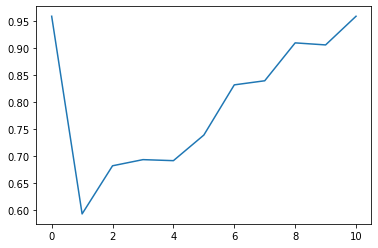

In [47]:
xx=[]
for i in range(int(xtrain_mod.shape[1])):
    xx.append(i)
plt.plot(xx,yy)

#### The graph clearly shows that no component reduction is required in the dataset

## Support Vector Machine (SVM)

In [31]:
from sklearn.svm import SVC

In [49]:
svc=SVC(kernel='poly',C=100000)
svc.fit(xtrain_mod,ytrain_mod)
print(svc.score(xtrain,ytrain),svc.score(xtest,ytest))
print(svc.score(xtrain_mod,ytrain_mod),svc.score(xtest_mod,ytest_mod))

0.30532212885154064 0.3333333333333333
0.9738562091503268 0.9640151515151515


In [50]:
svcLinear=SVC(kernel='linear',C=1)
svcLinear.fit(xtrain,ytrain)
svcLinear_mod=SVC(kernel='linear',C=1)
svcLinear_mod.fit(xtrain_mod,ytrain_mod)
print(svcLinear.score(xtrain,ytrain),svcLinear.score(xtest,ytest))
print(svcLinear_mod.score(xtrain_mod,ytrain_mod),svcLinear.score(xtest_mod,ytest_mod))

0.6013071895424836 0.5587121212121212
0.7973856209150327 0.42234848484848486


### Linear Kernel

In [51]:
cvalues=[]
trainscores=[]
testscores=[]
max_score=0
for c in range(1,100,1):
        svcLinear=SVC(kernel='linear',C=c)
        svcLinear.fit(xtrain,ytrain)
        sctrain=svcLinear.score(xtrain,ytrain)
        sctest=svcLinear.score(xtest,ytest)
        cvalues.append(c)
        trainscores.append(sctrain)
        testscores.append(sctest)
        if sctest>max_score:
            max_score=sctest
            optimum_c=c
        print(".",end="")
print()
print("Scaled Data")
print("Optimum C=",optimum_c,"With score=",max_score)

...................................................................................................
Scaled Data
Optimum C= 4 With score= 0.5643939393939394


In [69]:
cvalues_mod=[]
trainscores_mod=[]
testscores_mod=[]
max_score=0
for c in range(1,100,1):
        svcLinear=SVC(kernel='linear',C=c)
        svcLinear.fit(xtrain_mod,ytrain_mod)
        sctrain=svcLinear.score(xtrain_mod,ytrain_mod)
        sctest=svcLinear.score(xtest_mod,ytest_mod)
        cvalues.append(c)
        trainscores_mod.append(sctrain)
        testscores_mod.append(sctest)
        if sctest>max_score:
            max_score=sctest
            optimum_c=c
        print(".",end="")
print()
print("Scaled and Modified Data")
print("Optimum C=",optimum_c,"With score=",max_score)

...................................................................................................
Scaled and Modified Data
Optimum C= 77 With score= 0.9981060606060606


#### Again Modified Data outperforms simple scaled data

### rbf Kernel

In [54]:
cvalues2=[]
trainscores2=[]
testscores2=[]
max_score=0
for c in range(1,100,1):
        svcLinear=SVC(kernel='rbf',C=c)
        svcLinear.fit(xtrain,ytrain)
        sctrain=svcLinear.score(xtrain,ytrain)
        sctest=svcLinear.score(xtest,ytest)
        cvalues2.append(c)
        trainscores2.append(sctrain)
        testscores2.append(sctest)
        if sctest>max_score:
            max_score=sctest
            optimum_c=c
        print(".",end="")
print()
print("Scaled Data")
print("Optimum C=",optimum_c,"With score=",max_score)

...................................................................................................
Scaled Data
Optimum C= 9 With score= 0.6212121212121212


In [64]:
cvalues2_mod=[]
trainscores2_mod=[]
testscores2_mod=[]
max_score=0
for c in range(1,100,1):
        svcLinear=SVC(kernel='rbf',C=c)
        svcLinear.fit(xtrain_mod,ytrain_mod)
        sctrain=svcLinear.score(xtrain_mod,ytrain_mod)
        sctest=svcLinear.score(xtest_mod,ytest_mod)
        cvalues2_mod.append(c)
        trainscores2_mod.append(sctrain)
        testscores2_mod.append(sctest)
        if sctest>max_score:
            max_score=sctest
            optimum_c=c
        print(".",end="")
print()
print("Scaled and Modified Data")
print("Optimum C=",optimum_c,"With score=",max_score)

...................................................................................................
Scaled and Modified Data
Optimum C= 97 With score= 0.9393939393939394


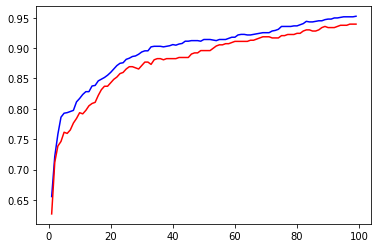

In [67]:
#PLot
plt.plot(cvalues2_mod,trainscores2_mod,c='b')
plt.plot(cvalues2_mod,testscores2_mod,c='r')
plt.show()

### poly kernel

In [57]:
cvalues3=[]
trainscores3=[]
testscores3=[]
max_score=0
for c in range(1,100,1):
        svcLinear=SVC(kernel='poly',C=c)
        svcLinear.fit(xtrain,ytrain)
        sctrain=svcLinear.score(xtrain,ytrain)
        sctest=svcLinear.score(xtest,ytest)
        cvalues3.append(c)
        trainscores3.append(sctrain)
        testscores3.append(sctest)
        if sctest>max_score:
            max_score=sctest
            optimum_c=c
        print(".",end="")
print()
print("Scaled Data")
print("Optimum C=",optimum_c,"With score=",max_score)

...................................................................................................
Scaled Data
Optimum C= 9 With score= 0.5909090909090909


In [58]:
cvalues3_mod=[]
trainscores3_mod=[]
testscores3_mod=[]
max_score=0
for c in range(1,100,1):
        svcLinear=SVC(kernel='poly',C=c)
        svcLinear.fit(xtrain_mod,ytrain_mod)
        sctrain=svcLinear.score(xtrain_mod,ytrain_mod)
        sctest=svcLinear.score(xtest_mod,ytest_mod)
        cvalues3_mod.append(c)
        trainscores3_mod.append(sctrain)
        testscores3_mod.append(sctest)
        if sctest>max_score:
            max_score=sctest
            optimum_c=c
        print(".",end="")
print()
print("Scaled and Modified Data")
print("Optimum C=",optimum_c,"With score=",max_score)

...................................................................................................
Scaled and Modified Data
Optimum C= 98 With score= 0.4962121212121212


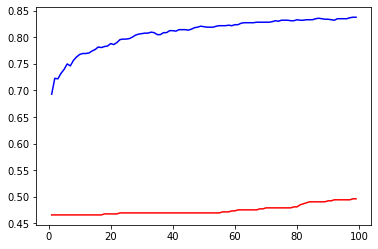

In [59]:
# Plot
plt.plot(cvalues3_mod,trainscores3_mod,c='b')
plt.plot(cvalues3_mod,testscores3_mod,c='r')
plt.show()

linear
[0.5965909090909091, 0.7651515151515151, 0.7973484848484849, 0.8333333333333334, 0.8560606060606061, 0.8617424242424242, 0.875, 0.884469696969697, 0.8882575757575758, 0.8939393939393939, 0.9109848484848485, 0.9659090909090909, 0.9848484848484849, 0.9943181818181818, 0.9981060606060606, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


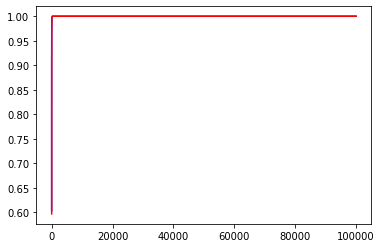

rbf
[0.5795454545454546, 0.6268939393939394, 0.7121212121212122, 0.7386363636363636, 0.7462121212121212, 0.7613636363636364, 0.759469696969697, 0.7651515151515151, 0.7765151515151515, 0.7840909090909091, 0.7935606060606061, 0.865530303030303, 0.8958333333333334, 0.9204545454545454, 0.9393939393939394, 0.9659090909090909, 0.9734848484848485, 0.9924242424242424, 0.9943181818181818, 0.9943181818181818, 0.9943181818181818, 0.9943181818181818, 0.9943181818181818, 0.9943181818181818, 0.9943181818181818, 0.9943181818181818]


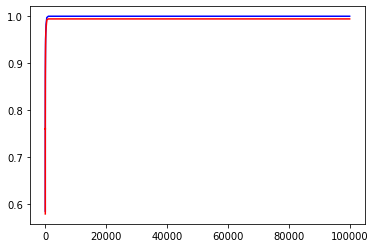

poly
[0.4640151515151515, 0.4659090909090909, 0.4659090909090909, 0.4659090909090909, 0.4659090909090909, 0.4659090909090909, 0.4659090909090909, 0.4659090909090909, 0.4659090909090909, 0.4659090909090909, 0.4659090909090909, 0.4696969696969697, 0.4696969696969697, 0.4791666666666667, 0.4962121212121212, 0.5700757575757576, 0.5965909090909091, 0.6117424242424242, 0.7272727272727273, 0.7443181818181818, 0.7518939393939394, 0.7613636363636364, 0.7689393939393939, 0.8200757575757576, 0.865530303030303, 0.9640151515151515]


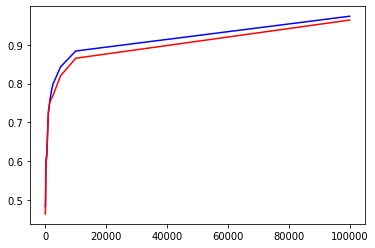

In [83]:
cc=[0.1,1,2,3,4,5,6,7,8,9,10,25,50,75,100,175,250,500,1000,1250,1500,2000,2500,5000,10000,100000]#,100,1000,10000,100000]
kernel=['linear','rbf','poly']
for k in kernel:
    train=[]
    test=[]
    for i in range(len(cc)):
        svc=SVC(kernel=k,C=cc[i])
        svc.fit(xtrain_mod,ytrain_mod)
        scoretrain=svc.score(xtrain_mod,ytrain_mod)
        scoretest=svc.score(xtest_mod,ytest_mod)
        train.append(scoretrain)
        test.append(scoretest)
    print(k)
    print(test)
    plt.plot(cc,train,c='b')
    plt.plot(cc,test,c='r')
    plt.show()
    del train[:]
    del test[:]

#### The above experiments show that Linear Kernel gives the best performance upon optimizing c, followed by rbf kernel and poly kernel shows worst performance. Therefore using linear kernel.
#### But for very high values of C, testing score of poly kernel begins to overtake (at nearly C=800) the training score.
#### Rate of score improvment wrt C: linear>rbf>poly

### Grid Search CV algorithm for finding optimum parameters
#### Finding optimum gamma

In [45]:
svcLinear=SVC(kernel='linear',C=100,decision_function_shape='ovo',gamma=0.01)
svcLinear.fit(xtrain_mod,ytrain_mod)
sctrain=svcLinear.score(xtrain_mod,ytrain_mod)
sctest=svcLinear.score(xtest_mod,ytest_mod)
print(sctrain,sctest)

0.9971988795518207 0.9981060606060606


### Therefore Optimum model is found for the dataset- SVC(C=100,gamma=0.01)

In [34]:
import pickle as pkl
filename = 'winemodel.pkl'
pkl.dump(svcLinear, open(filename, 'wb'))